# Análise e Visualização de Dados: A Dívida Pública da Zona do Euro (Fonte AMECO)

---

## ℹ️ Fonte de Dados

O banco de dados AMECO (Annual Macro-Economic Database) é a fonte oficial de séries temporais macroeconómicas da Direção-Geral dos Assuntos Económicos e Financeiros da Comissão Europeia.

* **Link Oficial:** [AMECO database - European Commission](https://economy-finance.ec.europa.eu/economic-research-and-databases/economic-databases/ameco-database_en)

Pacotes python

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


### Carregando os dados ###

In [32]:
FILE = './../data/AMECO18.CSV'
data = pd.read_csv(FILE)

display(data.info)
display(data.columns)

<bound method DataFrame.info of                     SERIES CNTRY  TRN  AGG  UNIT  REF    CODE  \
0        EU27.1.0.0.0.UDGG  EU27    1    0     0    0    UDGG   
1        EU15.1.0.0.0.UDGG  EU15    1    0     0    0    UDGG   
2        EA19.1.0.0.0.UDGG  EA19    1    0     0    0    UDGG   
3        EA20.1.0.0.0.UDGG  EA20    1    0     0    0    UDGG   
4        EA12.1.0.0.0.UDGG  EA12    1    0     0    0    UDGG   
..                     ...   ...  ...  ...   ...  ...     ...   
617  TUR.1.0.99.327.UDGGLR   TUR    1    0    99  327  UDGGLR   
618  ISL.1.0.99.327.UDGGLR   ISL    1    0    99  327  UDGGLR   
619  NOR.1.0.99.327.UDGGLR   NOR    1    0    99  327  UDGGLR   
620  JPN.1.0.99.327.UDGGLR   JPN    1    0    99  327  UDGGLR   
621  USA.1.0.99.327.UDGGLR   USA    1    0    99  327  UDGGLR   

                           COUNTRY  \
0                   European Union   
1    European Union (15 countries)   
2         Euro area (19 countries)   
3                        Euro area 

Index(['SERIES', 'CNTRY', 'TRN', 'AGG', 'UNIT', 'REF', 'CODE', 'COUNTRY',
       'SUB-CHAPTER', 'TITLE', 'UNIT.1', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84'],
      dtype='object')

### **Tratamento dos dados brutos** ###

### Aplicando o melt ###
- Transformando do formato largo para longo

In [33]:
columns_year = [col for col in data.columns if col.isdigit() and len(col) == 4]
print(columns_year)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026']


In [34]:
columns_id = [
    col for col in data.columns
    if isinstance(col, str)
    and col not in columns_year
    and not col.startswith('Unnamed')
]
print(columns_id)

['SERIES', 'CNTRY', 'TRN', 'AGG', 'UNIT', 'REF', 'CODE', 'COUNTRY', 'SUB-CHAPTER', 'TITLE', 'UNIT.1']


### Aplicando o melt ###

In [35]:
melt = data.melt(
    id_vars=columns_id,
    value_vars=columns_year,
    var_name='Year',
    value_name='Value'
)

### Aplicando o Pivo ###

In [36]:
pivot = melt.pivot_table(
    index=['COUNTRY', 'Year'],
    columns='UNIT.1',
    values='Value',
    aggfunc='first'
)

pivot = pivot.reset_index()

df = pivot[[
    'COUNTRY',
    'Year',
    '(Percentage of GDP at current prices (excessive deficit procedure)) ',
    'Mrd ECU/EUR',
    'Mrd USD'
]]

df = df.rename(columns={
    '(Percentage of GDP at current prices (excessive deficit procedure)) ': 'Divida_Percentual_PIB',
    'Mrd ECU/EUR': 'Divida_Absoluta_EUR',
    'Mrd USD': 'Divida_Absoluta_USD',
    'Year': 'Ano'
})



 **Estrutura Final**

In [37]:
display(df.shape)
display(df.head(10))
display(df.dtypes)
display(df.isnull().sum())

(1743, 5)

UNIT.1,COUNTRY,Ano,Divida_Percentual_PIB,Divida_Absoluta_EUR,Divida_Absoluta_USD
0,Albania,2010,57.7196,5.16,NaN
1,Albania,2011,59.4124,5.56,NaN
2,Albania,2012,62.1442,5.93,NaN
3,Albania,2013,65.5589,6.31,NaN
4,Albania,2014,70.0897,6.98,NaN
5,Albania,2015,72.7340,7.60,NaN
6,Albania,2016,72.4364,7.89,NaN
7,Albania,2017,70.1752,8.18,NaN
8,Albania,2018,67.6522,8.97,NaN
9,Albania,2019,64.9884,9.13,NaN


UNIT.1
COUNTRY                   object
Ano                       object
Divida_Percentual_PIB    float64
Divida_Absoluta_EUR      float64
Divida_Absoluta_USD      float64
dtype: object

UNIT.1
COUNTRY                     0
Ano                         0
Divida_Percentual_PIB       7
Divida_Absoluta_EUR       212
Divida_Absoluta_USD      1685
dtype: int64

In [38]:
df['Ano'] = df['Ano'].astype('int64')

In [39]:
df.to_csv('./../data/AMECO_TRATADO.csv', sep=';', index=False)

# Divida publica dos países da Europa

- Filtrando os dados 

In [40]:
df = df[df['Ano'] >= 2000]

### Divida Publica Da Alemanha ###

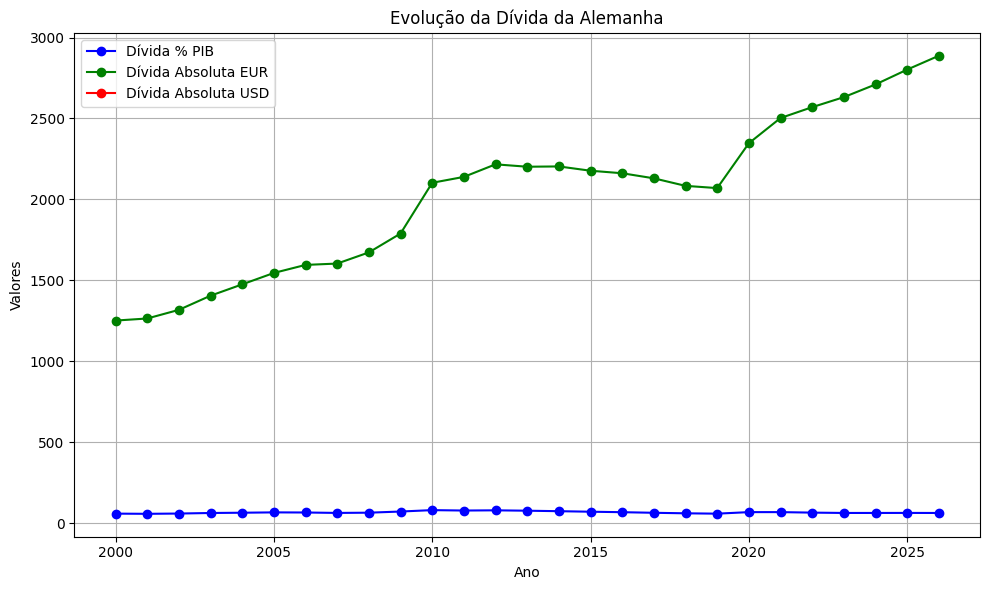

In [41]:
germany = df[df['COUNTRY'] == 'Germany']



plt.figure(figsize=(10,6))

plt.plot(germany['Ano'], germany['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(germany['Ano'], germany['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(germany['Ano'], germany['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Alemanha')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('germany.png', dpi=300)
plt.show()


### Divida publica França ###

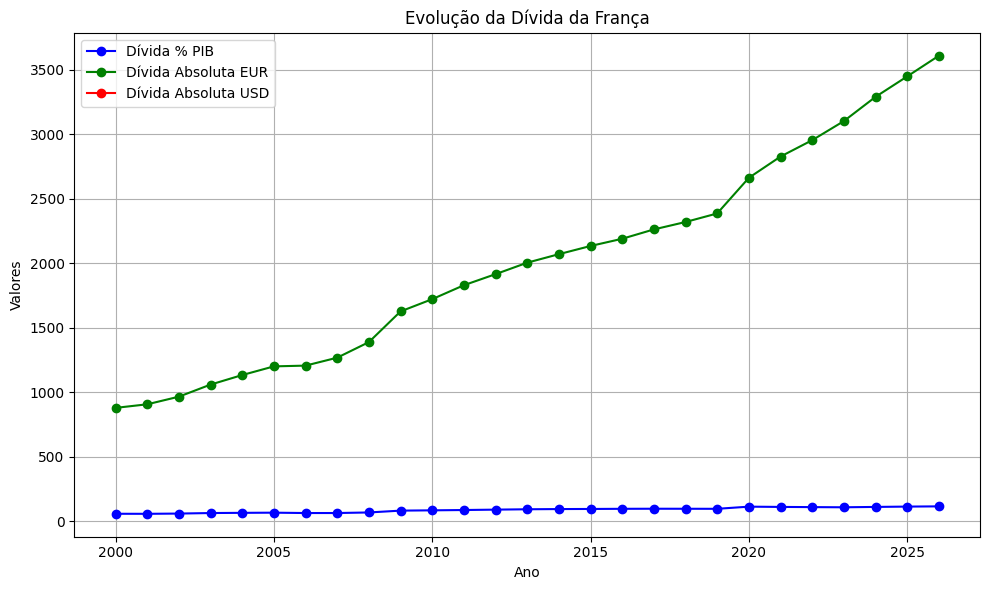

In [42]:
france_data = df[df['COUNTRY'] == 'France']

plt.figure(figsize=(10,6))

plt.plot(france_data['Ano'], france_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(france_data['Ano'], france_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(france_data['Ano'], france_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da França')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('france.png', dpi=300)

plt.show()

### Divida publica da suecia ###

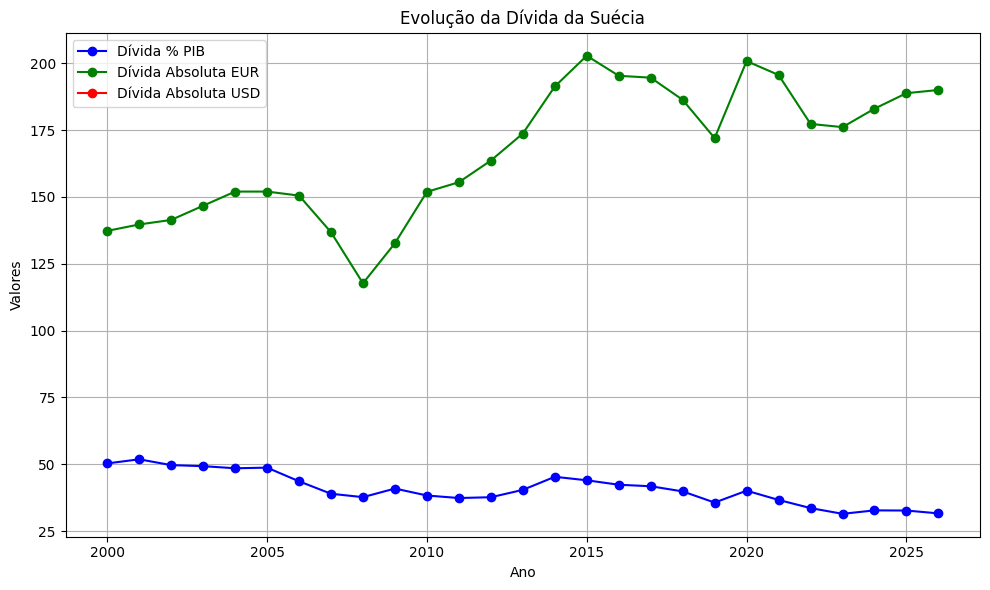

In [43]:
sweden_data = df[df['COUNTRY'] == 'Sweden']

plt.figure(figsize=(10,6))

plt.plot(sweden_data['Ano'], sweden_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(sweden_data['Ano'], sweden_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(sweden_data['Ano'], sweden_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Suécia')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sweden.png', dpi=300)

plt.show()

### Divida publica das Países Baixos ###

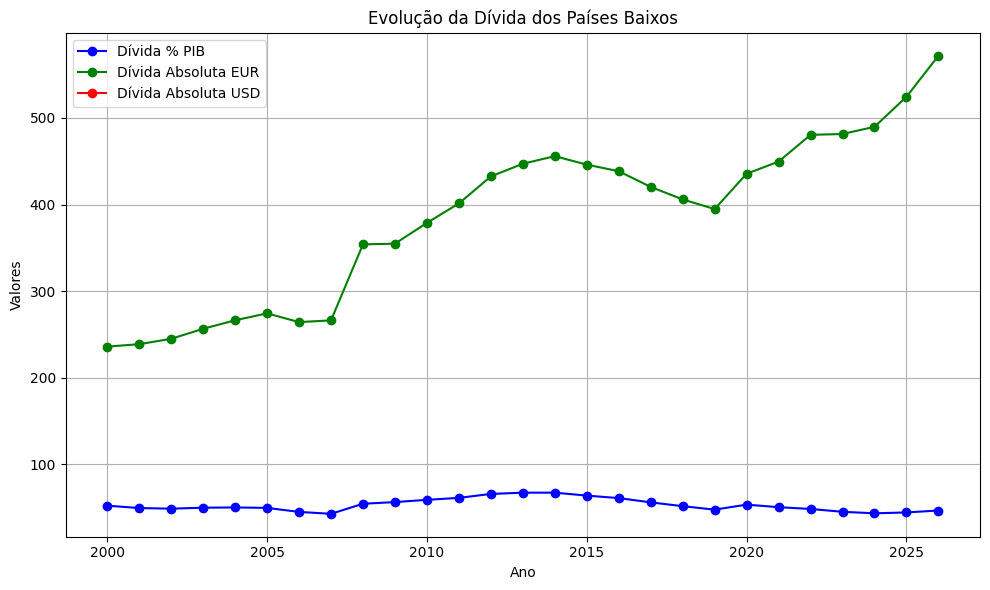

In [44]:
netherlands_data = df[df['COUNTRY'] == 'Netherlands']

plt.figure(figsize=(10,6))

plt.plot(netherlands_data['Ano'], netherlands_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(netherlands_data['Ano'], netherlands_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(netherlands_data['Ano'], netherlands_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida dos Países Baixos')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('netherlands.png', dpi=300)

plt.show()

### Divida publica da Espanha ###

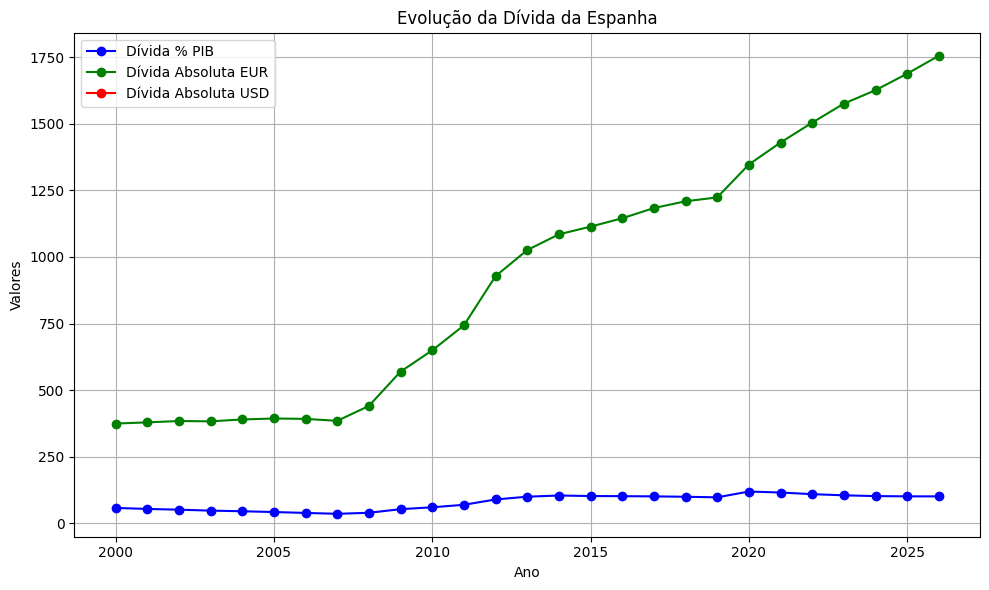

In [45]:
spain_data = df[df['COUNTRY'] == 'Spain']

plt.figure(figsize=(10,6))

plt.plot(spain_data['Ano'], spain_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(spain_data['Ano'], spain_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(spain_data['Ano'], spain_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Espanha')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('spain.png', dpi=300)

plt.show()

### Divida publica da Italiá ###

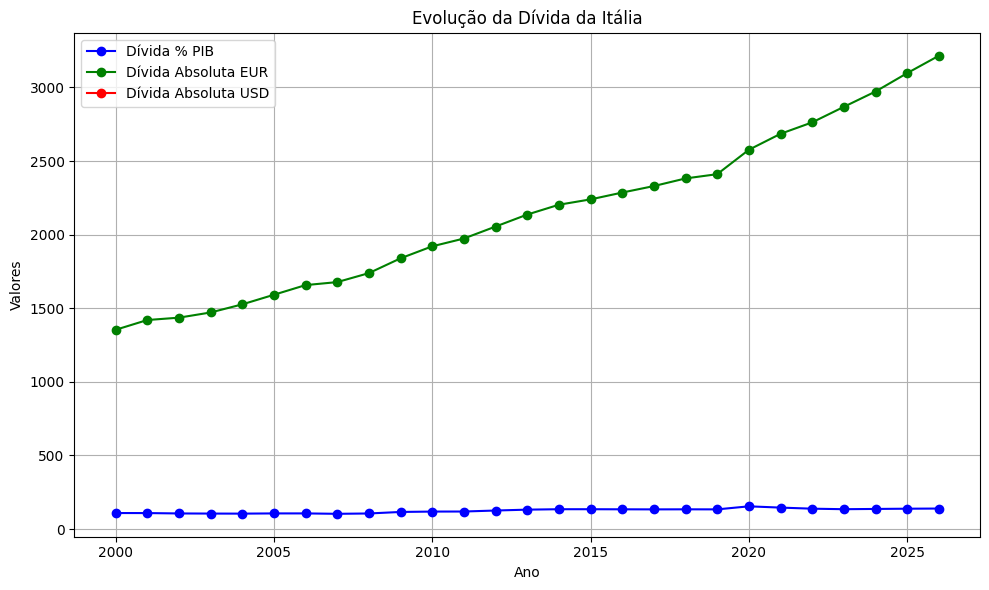

In [46]:
italy_data = df[df['COUNTRY'] == 'Italy']

plt.figure(figsize=(10,6))

plt.plot(italy_data['Ano'], italy_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(italy_data['Ano'], italy_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(italy_data['Ano'], italy_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Itália')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('italia.png', dpi=300)
plt.show()

### Divida publica da Polonia ###

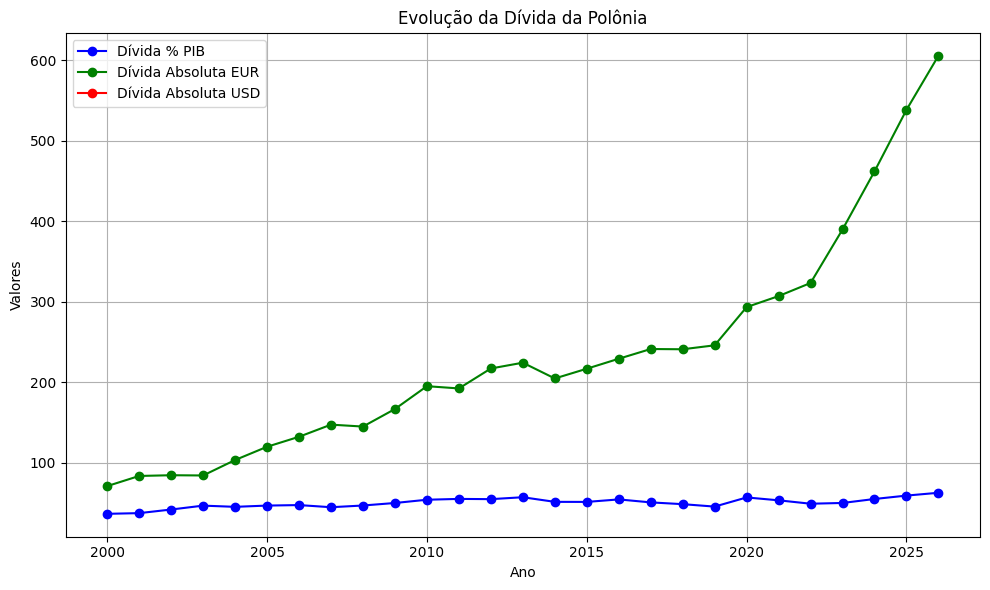

In [47]:
poland_data = df[df['COUNTRY'] == 'Poland']

plt.figure(figsize=(10,6))

plt.plot(poland_data['Ano'], poland_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(poland_data['Ano'], poland_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(poland_data['Ano'], poland_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Polônia')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('poland.png', dpi=300)
plt.show()

### Divida publica da Finlandia ###

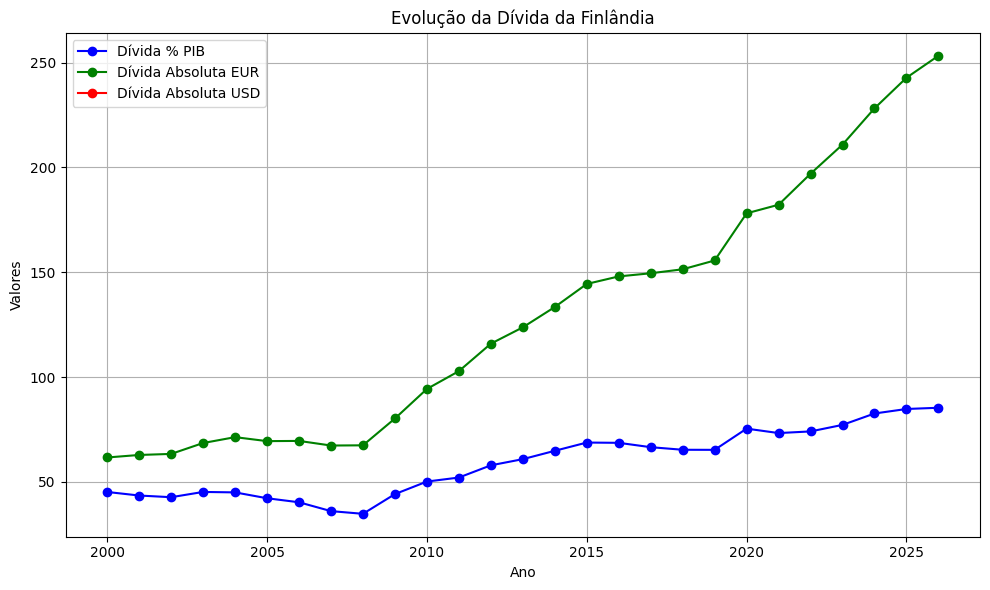

In [48]:
finland_data = df[df['COUNTRY'] == 'Finland']

plt.figure(figsize=(10,6))

plt.plot(finland_data['Ano'], finland_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(finland_data['Ano'], finland_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(finland_data['Ano'], finland_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Finlândia')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('finland.png', dpi=300)
plt.show()

### Divida publica da Belgica ###

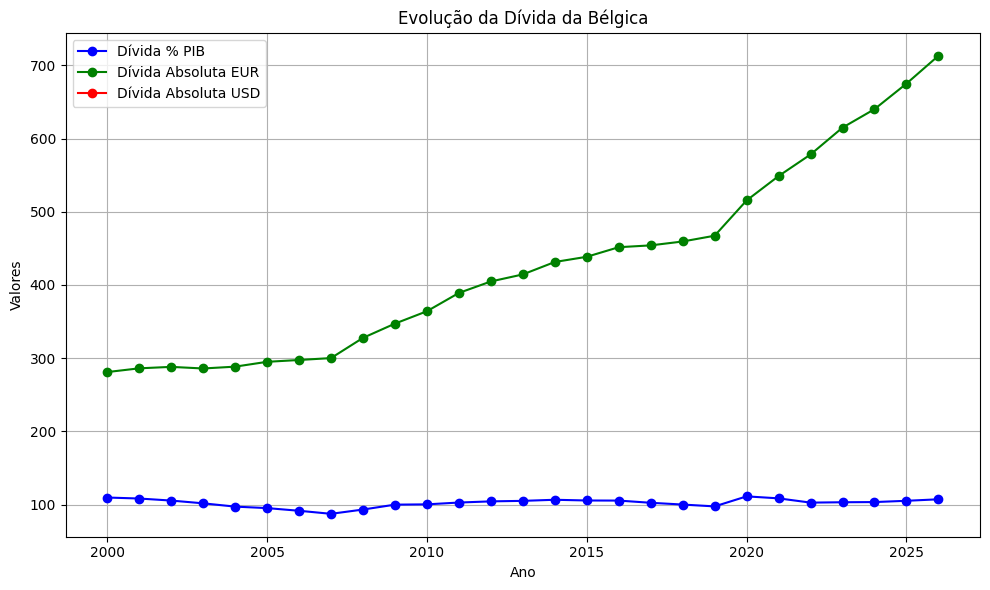

In [49]:
belgium_data = df[df['COUNTRY'] == 'Belgium']

plt.figure(figsize=(10,6))

plt.plot(belgium_data['Ano'], belgium_data['Divida_Percentual_PIB'], marker='o', label='Dívida % PIB', color='blue')

plt.plot(belgium_data['Ano'], belgium_data['Divida_Absoluta_EUR'], marker='o', label='Dívida Absoluta EUR', color='green')

plt.plot(belgium_data['Ano'], belgium_data['Divida_Absoluta_USD'], marker='o', label='Dívida Absoluta USD', color='red')

plt.title('Evolução da Dívida da Bélgica')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('belgim.png', dpi=300)
plt.show()

### Conclusão

Todos os países apresentaram aumento da dívida pública no período da **crise econômica de 2008 a 2015** e depois outro aumento durante a **crise sanitária e bélica**, marcada pela **COVID-19** e pela **guerra na Ucrânia**.

---

### Crise financeira global (2008–2015)

- Houve **forte aumento da dívida pública** em quase todos os países.  
- **Motivo:** pacotes de estímulo, resgates bancários, queda da arrecadação e aumento de gastos sociais.  
- **Exemplos claros:** Espanha e Itália tiveram explosão de dívida, enquanto Alemanha e Países Baixos cresceram de forma mais moderada, mas ainda assim subiram.  

---

### Crise sanitária e geopolítica (2020 em diante)

- Novo aumento expressivo devido à **COVID-19** (gastos emergenciais, subsídios, queda da atividade econômica).  
- A **guerra na Ucrânia (2022)** também pressionou as finanças públicas, com gastos extras em defesa, energia e inflação.  
- **Bélgica, Espanha e Itália** mostram aceleração clara nesse período. **Alemanha e Países Baixos** também retomam trajetória de alta.  

---

💡 **Insight:**  
A projeção da dívida pública dos países da Europa tende a aumentar com os pacotes de ajuda militar e econômica à Ucrânia, além do financiamento das próprias forças armadas e da indústria bélica.
